In [2]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import import_ipynb
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from distmesh import *
from FEM_Nonlinear import *
#plt.style.use('seaborn')

In [3]:
# parameters of bounding box
xmin, xmax = -1,1
ymin, ymax = -1,1

# h0 is the desired scaling parameter for the mesh
h0 = 0.04

# iterations
iterations = 50

### Mesh Generation

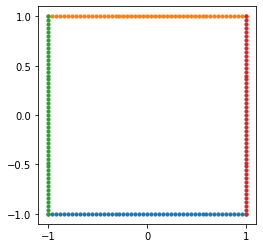

In [4]:
# points fixed on boundary of box
N = int((xmax-xmin)/h0)
pts_fix = put_pts_on_square(xmin,xmax,N)

ptsA = pts_fix[0]
ptsB = pts_fix[1]
ptsC = pts_fix[2]
ptsD = pts_fix[3]

# scatter plot of fixed points
plt.scatter(ptsA[:,0],ptsA[:,1],s=10)
plt.scatter(ptsB[:,0],ptsB[:,1],s=10)
plt.scatter(ptsC[:,0],ptsC[:,1],s=10)
plt.scatter(ptsD[:,0],ptsD[:,1],s=10)
axes=plt.gca()
axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})

count =  200 displacement =  0.012168586783411093
count =  400 displacement =  0.0034232089969463554
count =  600 displacement =  0.0037272056505444967
count =  800 displacement =  0.003385927624387421
count =  1000 displacement =  0.0026123859523727363


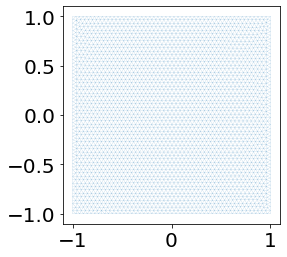

In [5]:
def dfunc(p):
    return drectangle(p,xmin,xmax,ymin,ymax)

pfix = [[xmin,ymin], [xmin,ymax], [xmax,ymin], [xmax,ymax]]
pts, tri = distmesh2D(dfunc, huniform, h0, [xmin, xmax, ymin, ymax], pfix)

Npts = np.size(pts,axis=0)
Ntri = np.size(tri,axis=0)

### Zero Boundary Condition, U=-1 Initial Condition - Figure 5 (Left) in Alberty et al.

In [13]:
#Dirchlet conditions on bounding box
LeftVal = 0
RightVal = 0
UpVal = 0
DownVal = 0

# find the mesh points lying on the Dirichlet boundary

NAind, Leftind = find_bdry_pts_rec_ver(pts,ymin,h0)  #Dirchlet boundary at ymin
NBind, Rightind = find_bdry_pts_rec_ver(pts,ymax,h0)  #Dirchlet boundary at ymax
NCind, Downind = find_bdry_pts_rec_ver(pts,xmin,h0)  #Dirchlet boundary at xmin
NDind, Upind = find_bdry_pts_rec_ver(pts,xmax,h0)  #Dirchlet boundary at xmax


#initial condition
q = -1*np.ones((Npts,1))

# find using FEM
soln = FEM_solver(pts,tri,Leftind,LeftVal,Rightind,RightVal,Downind,DownVal,Upind,UpVal,iterations,q)

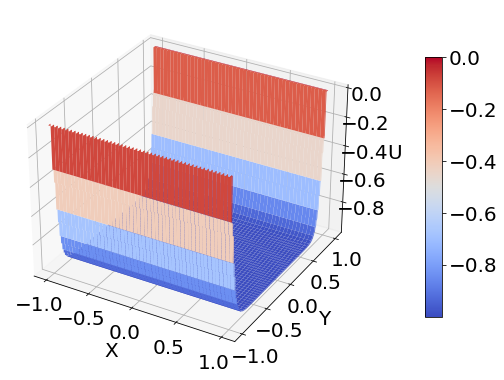

In [14]:
# Create a 3D figure
fig = plt.figure(figsize=(8, 8))
axs = fig.add_subplot(111, projection='3d')

# Generate mesh grid
x = np.linspace(-1, 1, Npts)
y = np.linspace(-1, 1, Npts)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface with a colormap
ax = axs.plot_surface(X, Y, soln[len(soln)-1], cmap='coolwarm')

# Add a color legend
cbar = fig.colorbar(ax, shrink=0.5, aspect=15)
#cbar.set_label('Function Values')

# Adjust the position and width of the color legend
cbar.ax.yaxis.set_label_coords(1.2, 0.5)
cbar.ax.set_position([0.85, 0.1, 0.03, 0.8])

# Add labels and title
axs.set_xlabel('X', labelpad=10)
axs.set_ylabel('Y', labelpad=10)
axs.set_zlabel('U', labelpad=10)

#plt.tight_layout()
plt.show()

### Zero Boundary Condition, U=Sign(x) Initial Condition - Figure 5 (Right) in Alberty et al.

In [16]:
#initial condition
q = np.sign(pts[:, 0]).reshape(Npts,1)

# find using FEM
soln = FEM_solver(pts,tri,Leftind,LeftVal,Rightind,RightVal,Downind,DownVal,Upind,UpVal,iterations,q)

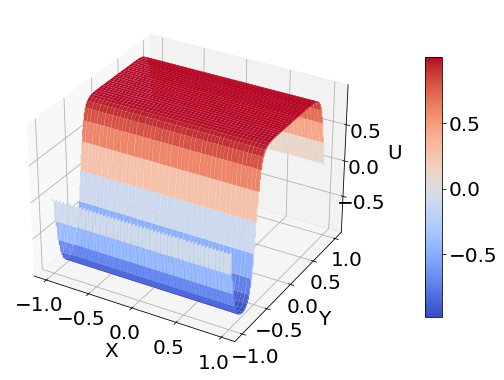

In [17]:
# Create a 3D figure
fig = plt.figure(figsize=(8, 8))
axs = fig.add_subplot(111, projection='3d')

# Generate mesh grid
x = np.linspace(-1, 1, Npts)
y = np.linspace(-1, 1, Npts)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface with a colormap
ax = axs.plot_surface(X, Y, soln[len(soln)-1], cmap='coolwarm')

# Add a color legend
cbar = fig.colorbar(ax, shrink=0.5, aspect=15)
#cbar.set_label('Function Values')

# Adjust the position and width of the color legend
cbar.ax.yaxis.set_label_coords(1.2, 0.5)
cbar.ax.set_position([0.85, 0.1, 0.03, 0.8])

# Add labels and title
axs.set_xlabel('X', labelpad=10)
axs.set_ylabel('Y', labelpad=10)
axs.set_zlabel('U', labelpad=10)

#plt.tight_layout()
plt.show()

### Frustrated Boundary Condition, U=-1 Initial Condition

In [18]:
#Dirchlet conditions on bounding box
LeftVal = 1
RightVal = 1
UpVal = -1
DownVal = -1

# find the mesh points lying on the Dirichlet boundary

NAind, Leftind = find_bdry_pts_rec_ver(pts,ymin,h0)  #Dirchlet boundary at ymin
NBind, Rightind = find_bdry_pts_rec_ver(pts,ymax,h0)  #Dirchlet boundary at ymax
NCind, Downind = find_bdry_pts_rec_ver(pts,xmin,h0)  #Dirchlet boundary at xmin
NDind, Upind = find_bdry_pts_rec_ver(pts,xmax,h0)  #Dirchlet boundary at xmax


#initial condition
q = -1*np.ones((Npts,1))

# find using FEM
soln = FEM_solver(pts,tri,Leftind,LeftVal,Rightind,RightVal,Downind,DownVal,Upind,UpVal,iterations,q)

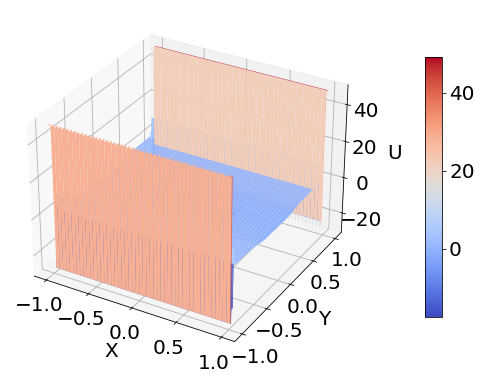

In [19]:
# Create a 3D figure
fig = plt.figure(figsize=(8, 8))
axs = fig.add_subplot(111, projection='3d')

# Generate mesh grid
x = np.linspace(-1, 1, Npts)
y = np.linspace(-1, 1, Npts)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface with a colormap
ax = axs.plot_surface(X, Y, soln[len(soln)-1], cmap='coolwarm')

# Add a color legend
cbar = fig.colorbar(ax, shrink=0.5, aspect=15)
#cbar.set_label('Function Values')

# Adjust the position and width of the color legend
cbar.ax.yaxis.set_label_coords(1.2, 0.5)
cbar.ax.set_position([0.85, 0.1, 0.03, 0.8])

# Add labels and title
axs.set_xlabel('X', labelpad=10)
axs.set_ylabel('Y', labelpad=10)
axs.set_zlabel('U', labelpad=10)

#plt.tight_layout()
plt.show()